Documentación pyedflib: https://pyedflib.readthedocs.io/en/latest/ref/edfreader.html  
Documentación networkx: https://networkx.org/documentation/stable/reference/introduction.html  
Información grafos: https://www.cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python.html  
Información mne: https://mne.tools/stable/index.html  

In [2]:
import mne
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap

from my_functions import *


df_subject_info = pd.read_csv('Archivos\subject-info.csv')[['Subject', 'Count quality']]

# Promedio

## Promedio de todos los sujetos - Antes y durante

In [63]:
# Obtener el promedio de la matriz de distancias
ave_before = np.zeros((19, 19))
ave_during = np.zeros((19, 19))

for i in range(N):
    subject = f'Subject{i:02}'
    csv_path1 = f'Archivos\\{subject}\\csv\\{subject}_1.csv'
    csv_path2 = f'Archivos\\{subject}\\csv\\{subject}_2.csv'

    ave_before += get_distances(csv_path1)
    ave_during += get_distances(csv_path2)

ave_before /= N
ave_during /= N

df_centrality_ave_bef = get_centrality_from_df(ave_before)
df_centrality_ave_dur = get_centrality_from_df(ave_during)

ave_before.to_csv('Archivos\\ave\\ave_distances_before.csv', sep=';', index=False)
ave_during.to_csv('Archivos\\ave\\ave_distances_during.csv', sep=';', index=False)

df_centrality_ave_bef.to_csv('Archivos\\ave\\ave_centrality_before.csv', sep=';', index=False)
df_centrality_ave_dur.to_csv('Archivos\\ave\\ave_centrality_during.csv', sep=';', index=False)

In [3]:
df_centrality_ave_bef = pd.read_csv('Archivos\\ave\\ave_centrality_before.csv', delimiter=';')
df_centrality_ave_bef['status'] = 'before'

df_centrality_ave_dur = pd.read_csv('Archivos\\ave\\ave_centrality_during.csv', delimiter=';')
df_centrality_ave_dur['status'] = 'during'

df_centrality_ave = pd.concat([df_centrality_ave_bef, df_centrality_ave_dur], ignore_index=True)

ave_before = pd.read_csv('Archivos\\ave\\ave_distances_before.csv', delimiter=';')
ave_before.index = CHANNELS

ave_during = pd.read_csv('Archivos\\ave\\ave_distances_during.csv', delimiter=';')
ave_during.index = CHANNELS

display(df_centrality_ave_bef.head(), df_centrality_ave_dur.head())
display(ave_before.head(), ave_during.head())

nodes    degree  betweenness  closeness  pagerank  status
0   Fp1  0.055556     0.000000   0.216867  0.034418  before
1   Fp2  0.055556     0.000000   0.216867  0.035438  before
2    F3  0.166667     0.215686   0.272727  0.082833  before
3    F4  0.166667     0.215686   0.272727  0.083693  before
4    F7  0.055556     0.000000   0.216867  0.034693  before

nodes    degree  betweenness  closeness  pagerank  status
0   Fp1  0.055556     0.000000   0.219512  0.035627  during
1   Fp2  0.055556     0.000000   0.219512  0.035204  during
2    F3  0.166667     0.215686   0.276923  0.084052  during
3    F4  0.166667     0.215686   0.276923  0.084196  during
4    F7  0.055556     0.000000   0.219512  0.034965  during

Fp1       Fp2        F3        F4        F7        F8        T3  \
Fp1  0.000000  0.966750  0.753063  0.895140  0.782608  1.081611  1.030000   
Fp2  0.966750  0.000000  0.894362  0.794862  1.086167  0.806985  1.191053   
F3   0.753063  0.894362  0.000000  0.644838  0.760892  0.957916  0.860003   
F4   0.895140  0.794862  0.644838  0.000000  0.986030  0.771889  1.031400   
F7   0.782608  1.086167  0.760892  0.986030  0.000000  1.150666  0.958963   

           T4        C3        C4        T5        T6        P3        P4  \
Fp1  1.182597  0.992317  1.052308  1.190921  1.362044  1.213450  1.274575   
Fp2  1.077521  1.062204  1.001154  1.334805  1.279051  1.258558  1.237585   
F3   1.038424  0.688389  0.804227  1.091273  1.267879  1.039769  1.107170   
F4   0.872287  0.808719  0.695457  1.216308  1.162186  1.103849  1.059815   
F7   1.222708  0.967527  1.088323  1.126716  1.384490  1.174703  1.259690   

           O1        O2        Fz        Cz        Pz  
Fp1  1.371777  1.392200  0.821530  0.990022  1.226651  
Fp2  1.398181  1.376156  0.814010  1.003633  1.236774  
F3   1.271747  1.287946  0.485101  0.695420  1.058354  
F4   1.298971  1.275471  0.486213  0.688271  1.065467  
F7   1.340095  1.370689  0.892047  1.015620  1.213153

Fp1       Fp2        F3        F4        F7        F8        T3  \
Fp1  0.000000  1.011630  0.853269  0.979507  0.874953  1.130377  1.068363   
Fp2  1.011630  0.000000  0.928222  0.841802  1.100883  0.871733  1.166162   
F3   0.853269  0.928222  0.000000  0.644904  0.832875  0.992509  0.829227   
F4   0.979507  0.841802  0.644904  0.000000  1.012554  0.848659  0.985038   
F7   0.874953  1.100883  0.832875  1.012554  0.000000  1.175635  0.973035   

           T4        C3        C4        T5        T6        P3        P4  \
Fp1  1.218230  1.036585  1.100308  1.190607  1.324744  1.209817  1.252216   
Fp2  1.088594  1.092114  1.038934  1.282659  1.248019  1.239973  1.217687   
F3   1.027603  0.683122  0.782273  1.052972  1.208957  0.987588  1.060274   
F4   0.882198  0.796840  0.685668  1.158580  1.109613  1.051015  1.020814   
F7   1.209377  0.986807  1.100332  1.142153  1.336290  1.172267  1.235130   

           O1        O2        Fz        Cz        Pz  
Fp1  1.333534  1.357507  0.913875  1.045555  1.232604  
Fp2  1.344820  1.335552  0.884223  1.035932  1.236140  
F3   1.208118  1.240036  0.512082  0.681278  1.026049  
F4   1.234741  1.226086  0.515590  0.679834  1.033274  
F7   1.319366  1.341880  0.940802  1.034341  1.205422

In [4]:
mst_ave_before = get_mst_from_df(ave_before)
mst_ave_during = get_mst_from_df(ave_during)

for i, node in enumerate(CHANNELS):
    mst_ave_before.nodes[node]['degree'] = round(df_centrality_ave_bef['degree'][i], 2)
    mst_ave_before.nodes[node]['betweenness'] = round(df_centrality_ave_bef['betweenness'][i], 2)
    mst_ave_before.nodes[node]['closeness'] = round(df_centrality_ave_bef['closeness'][i], 2)
    mst_ave_before.nodes[node]['pagerank'] = round(df_centrality_ave_bef['pagerank'][i], 2)

    mst_ave_during.nodes[node]['degree'] = round(df_centrality_ave_dur['degree'][i], 2)
    mst_ave_during.nodes[node]['betweenness'] = round(df_centrality_ave_dur['betweenness'][i], 2)
    mst_ave_during.nodes[node]['closeness'] = round(df_centrality_ave_dur['closeness'][i], 2)
    mst_ave_during.nodes[node]['pagerank'] = round(df_centrality_ave_dur['pagerank'][i], 2)

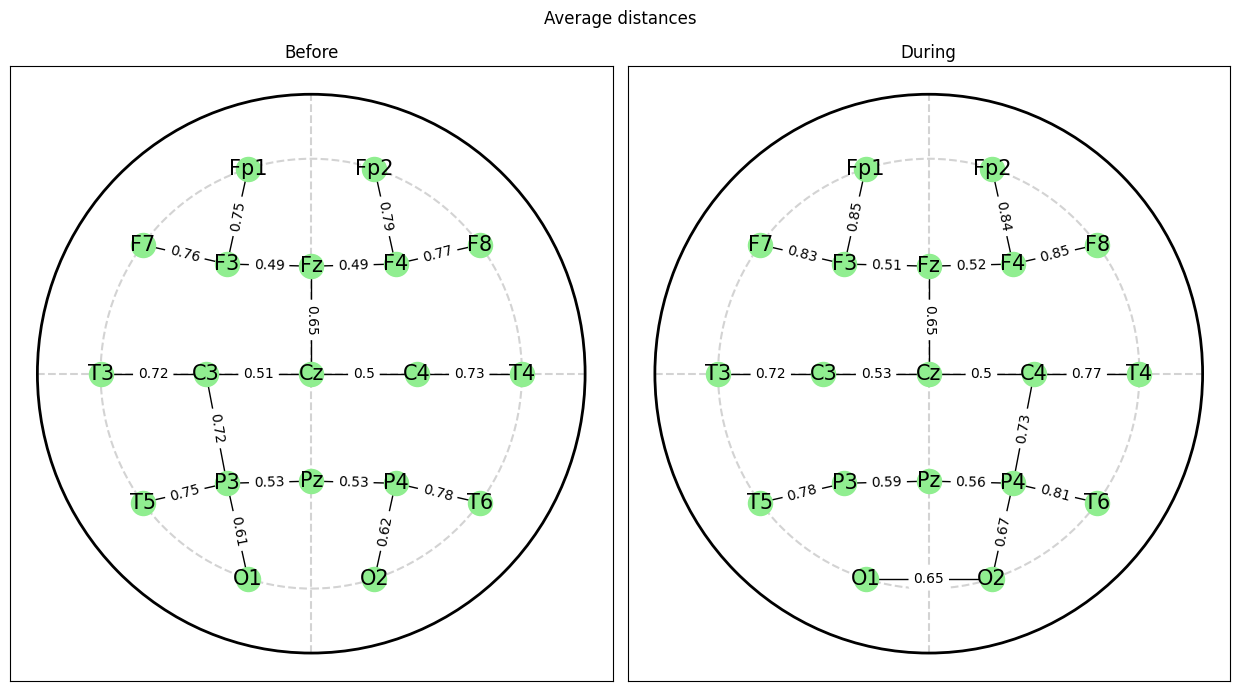

In [5]:
plot_mst_distances(mst_ave_before, mst_ave_during, 'Average distances')

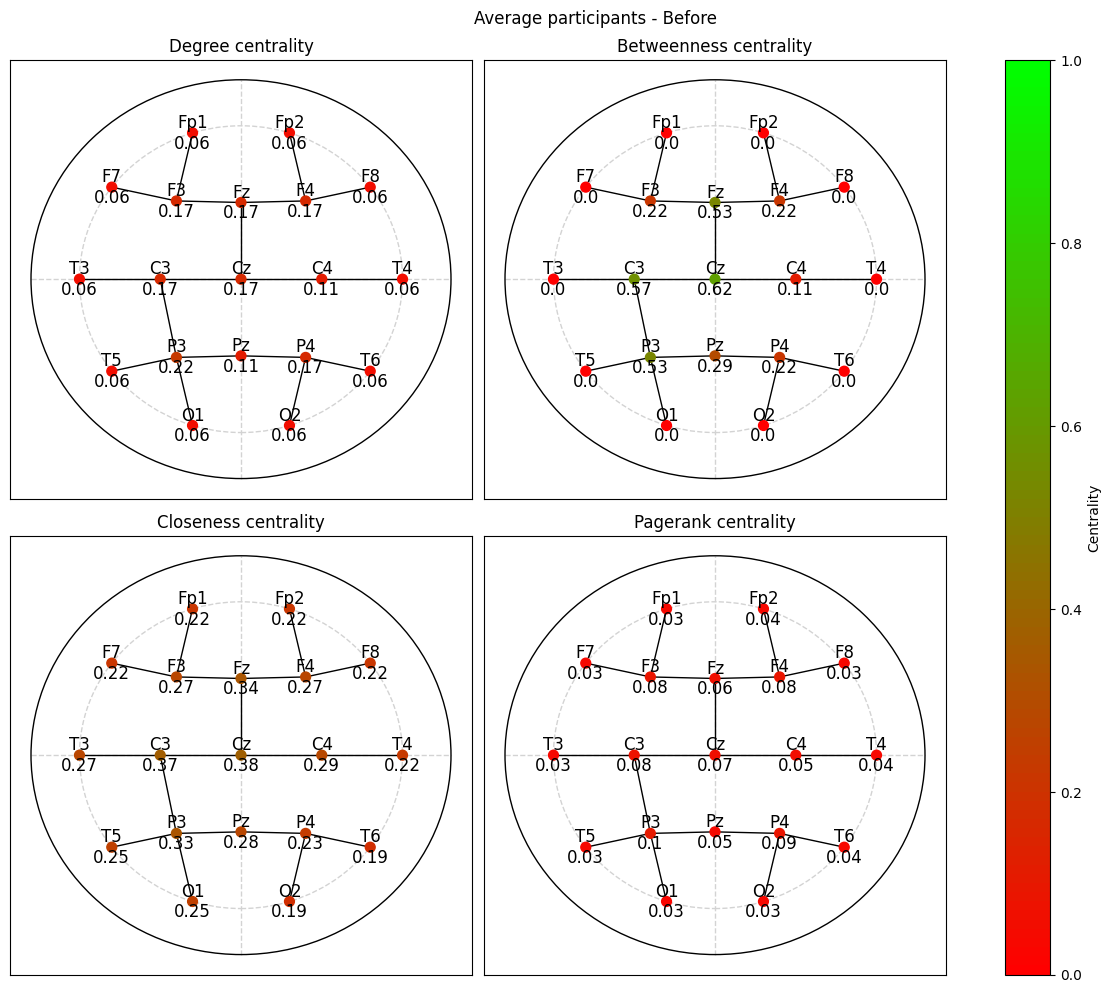

In [6]:
# Promedio de todos los participantes - antes

plot_all_measures(mst_ave_before, df_centrality_ave_bef, 'Average participants - Before')

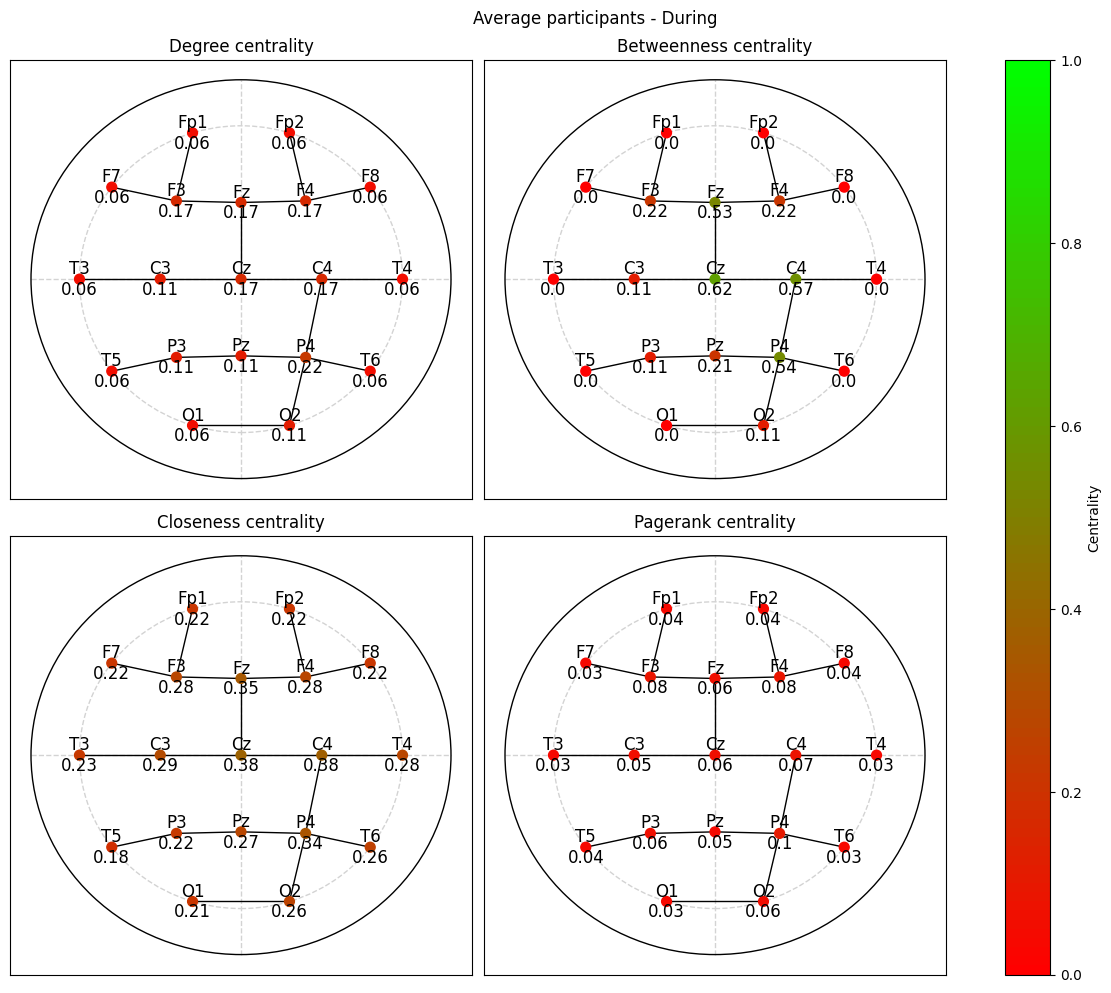

In [7]:
# Promedio de todos los participantes - durante
plot_all_measures(mst_ave_during, df_centrality_ave_dur, 'Average participants - During')

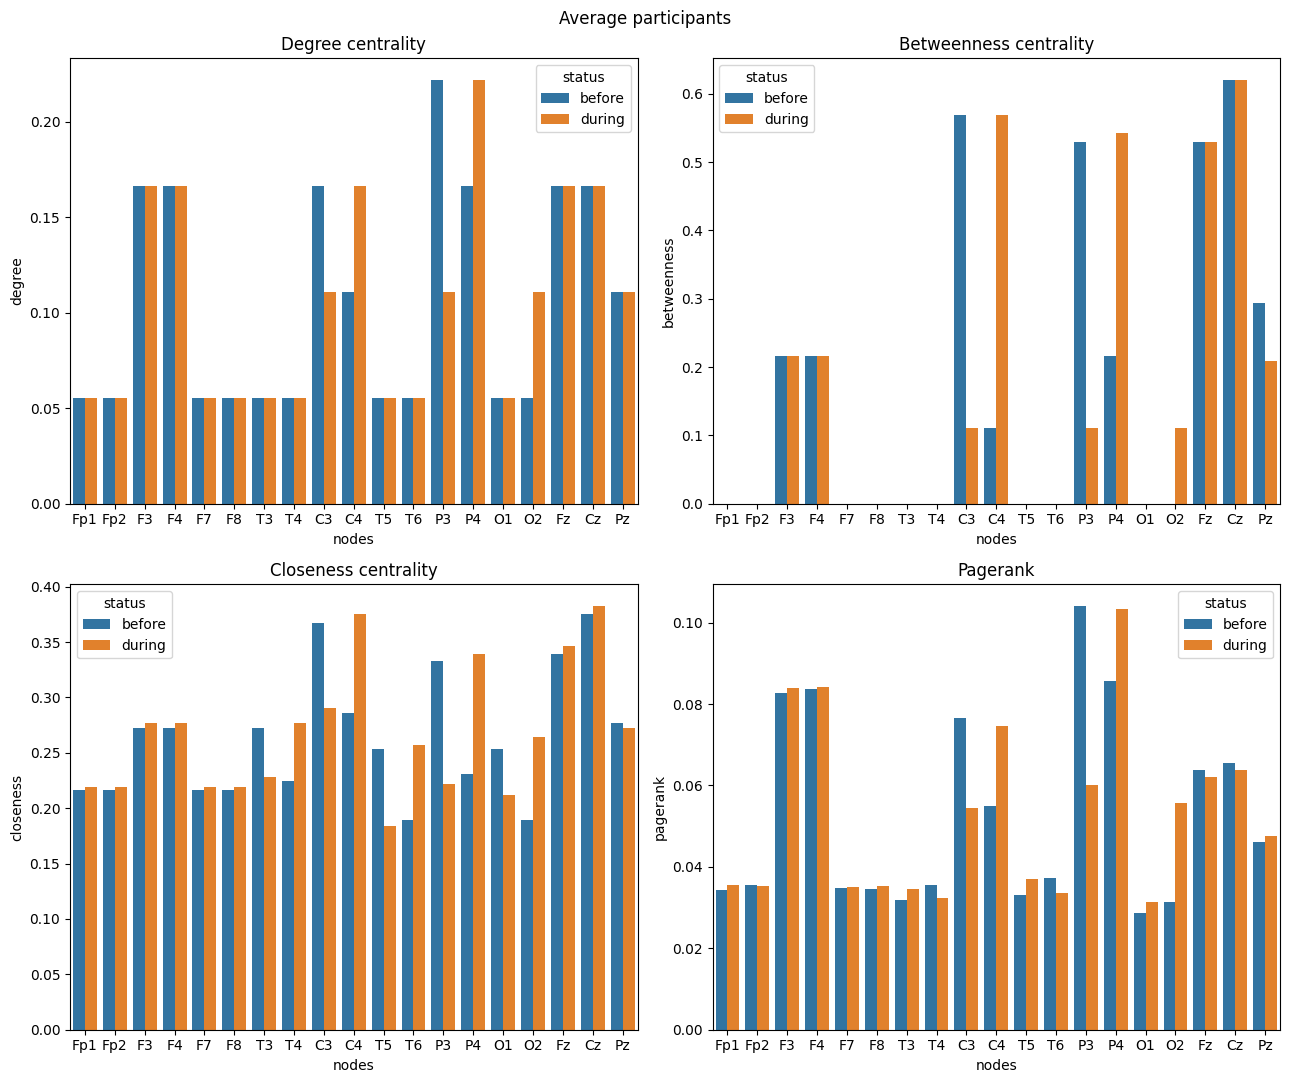

In [8]:
# Todos los nodos de los participantes durante

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Average participants')

ax1.set_title('Degree centrality')
sns.barplot(
    df_centrality_ave, x='nodes', y='degree', hue='status', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(
    df_centrality_ave, x='nodes', y='betweenness', hue='status', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_centrality_ave, x='nodes', y='closeness', hue='status', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_centrality_ave, x='nodes', y='pagerank', hue='status', ax=ax4
)

plt.tight_layout()

### Boxplots para las distancias con mayor diferencia en los grafos de promedio

En base al gráfico obtenido, las distancias que más tuvieron diferencias fueron

- Fp1 - F3  
Antes: 0.75  
Durante: 0.86  

- F7 - F3  
Antes: 0.76  
Durante: 0.84  

- F4 - F8:  
Antes: 0.77  
Durante: 0.85

In [10]:
# [Datos_antes, Datos_durante]
fp1_to_f3 = np.zeros((2, N), dtype='float32')
f7_to_f3 = np.zeros((2, N), dtype='float32')
f4_to_f8 = np.zeros((2, N), dtype='float32')

for i in range(N):
    subject = f'Subject{i:02}'
    csv_path1 = f'Archivos\\{subject}\\csv\\{subject}_1.csv'
    csv_path2 = f'Archivos\\{subject}\\csv\\{subject}_2.csv'

    temp_before = get_distances(csv_path1)
    temp_during = get_distances(csv_path2)

    fp1_to_f3[0][i], fp1_to_f3[1][i] = temp_before['Fp1']['F3'], temp_during['Fp1']['F3']
    f7_to_f3[0][i], f7_to_f3[1][i] = temp_before['F7']['F3'], temp_during['F7']['F3']
    f4_to_f8[0][i], f4_to_f8[1][i] = temp_before['F4']['F8'], temp_during['F4']['F8']

In [ ]:
def generate_df(array: np.ndarray, name: str) -> pd.DataFrame:
    df_bef: pd.DataFrame = pd.DataFrame({
        'pair': [name]*N, 'status': ['before']*N, 'distance': array[0]
    })

    df_dur: pd.DataFrame = pd.DataFrame({
        'pair': [name]*N, 'status': ['during']*N, 'distance': array[1]
    })

    return pd.concat([df_bef, df_dur], ignore_index=True)

df_fp1_to_f3 = generate_df(fp1_to_f3, 'Fp1 - F3')
df_f7_to_f3 = generate_df(f7_to_f3, 'F7 - F3')
df_f4_to_f8 = generate_df(f4_to_f8, 'F4 - F8')

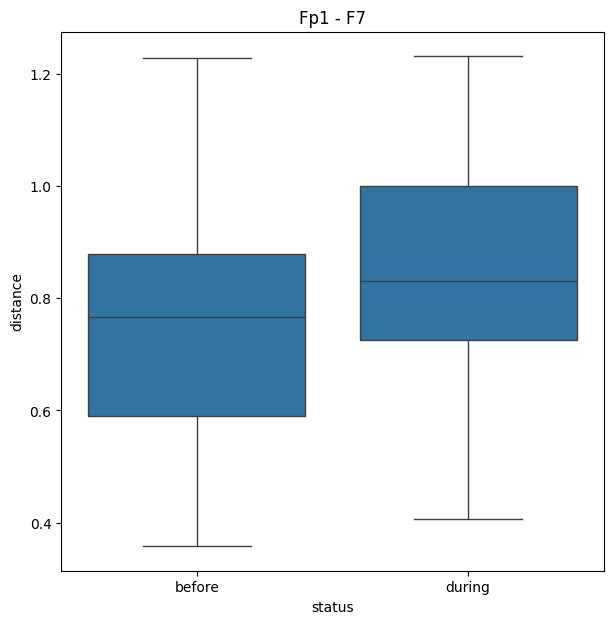

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('Fp1 - F7')

sns.boxplot(
    df_fp1_to_f3, x='status', y='distance', ax=ax
)

plt.show()

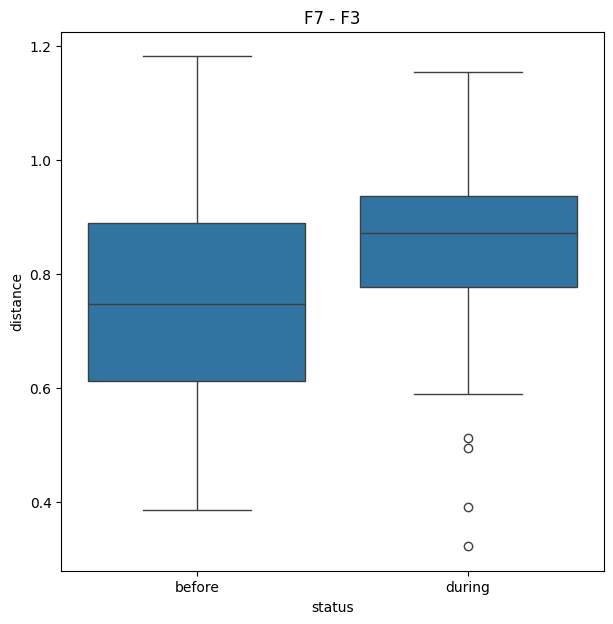

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('F7 - F3')

sns.boxplot(
    df_f7_to_f3, x='status', y='distance', ax=ax
)

plt.show()

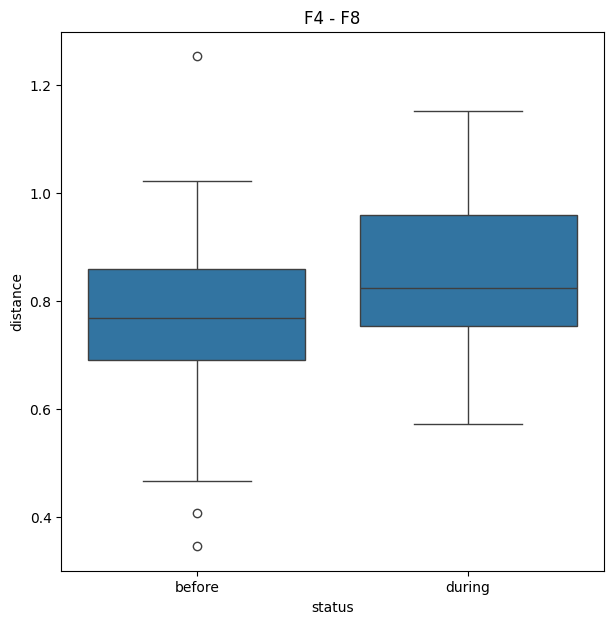

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('F4 - F8')

sns.boxplot(
    df_f4_to_f8, x='status', y='distance', ax=ax
)

plt.show()

## Promedio personas basado en su calidad de conteo - Antes y durante

In [77]:
# Promedio de las personas dependiendo de su calidad de conteo (antes y durante)

ave_b_before, ave_g_before = np.zeros((19, 19)), np.zeros((19, 19))
ave_b_during, ave_g_during = np.zeros((19, 19)), np.zeros((19, 19))
n_b, n_g = 0, 0

for i in range(N):
    subject = f'Subject{i:02}'
    csv_path1 = f'Archivos\\{subject}\\csv\\{subject}_1.csv'
    csv_path2 = f'Archivos\\{subject}\\csv\\{subject}_2.csv'

    if df_subject_info['Count quality'][i] == 1:
        ave_g_before += get_distances(csv_path1)
        ave_g_during += get_distances(csv_path2)
        n_g += 1
    else:
        ave_b_before += get_distances(csv_path1)
        ave_b_during += get_distances(csv_path2)
        n_b += 1

ave_g_before /= n_g
ave_g_during /= n_g
ave_b_before /= n_b
ave_b_during /= n_b

df_centrality_ave_g_before = get_centrality_from_df(ave_g_before)
df_centrality_ave_g_during = get_centrality_from_df(ave_g_during)
df_centrality_ave_b_before = get_centrality_from_df(ave_b_before)
df_centrality_ave_b_during = get_centrality_from_df(ave_b_during)

df_centrality_ave_g_before['status'] = 'before'
df_centrality_ave_g_during['status'] = 'during'
df_centrality_ave_b_before['status'] = 'before'
df_centrality_ave_b_during['status'] = 'during'

df_centrality_ave_g = pd.concat([df_centrality_ave_g_before, df_centrality_ave_g_during], ignore_index=True)
df_centrality_ave_b = pd.concat([df_centrality_ave_b_before, df_centrality_ave_b_during], ignore_index=True)

ave_g_before.to_csv('Archivos\\ave\\ave_distances_good_before.csv', sep=';', index=False)
ave_b_before.to_csv('Archivos\\ave\\ave_distances_bad_before.csv', sep=';', index=False)
ave_g_during.to_csv('Archivos\\ave\\ave_distances_good_during.csv', sep=';', index=False)
ave_b_during.to_csv('Archivos\\ave\\ave_distances_bad_during.csv', sep=';', index=False)

df_centrality_ave_g.to_csv('Archivos\\ave\\ave_centrality_good.csv', sep=';', index=False)
df_centrality_ave_b.to_csv('Archivos\\ave\\ave_centrality_bad.csv', sep=';', index=False)

In [11]:
df_centrality_ave_g = pd.read_csv('Archivos\\ave\\ave_centrality_good.csv', delimiter=';')
df_centrality_ave_b = pd.read_csv('Archivos\\ave\\ave_centrality_bad.csv', delimiter=';')

df_centrality_ave_g['Count quality'] = 'G'
df_centrality_ave_b['Count quality'] = 'B'

df_centrality_ave_counts = pd.concat([df_centrality_ave_b, df_centrality_ave_g], ignore_index=True)

df_centrality_ave_g_before = df_centrality_ave_g[df_centrality_ave_g['status'] == 'before']
df_centrality_ave_b_before = df_centrality_ave_b[df_centrality_ave_b['status'] == 'before']
df_centrality_ave_g_during = df_centrality_ave_g[df_centrality_ave_g['status'] == 'during'].reset_index(drop=True)
df_centrality_ave_b_during = df_centrality_ave_b[df_centrality_ave_b['status'] == 'during'].reset_index(drop=True)

ave_g_before = pd.read_csv('Archivos\\ave\\ave_distances_good_before.csv', delimiter=';')
ave_g_before.index = CHANNELS

ave_b_before = pd.read_csv('Archivos\\ave\\ave_distances_bad_before.csv', delimiter=';')
ave_b_before.index = CHANNELS

ave_g_during = pd.read_csv('Archivos\\ave\\ave_distances_good_during.csv', delimiter=';')
ave_g_during.index = CHANNELS

ave_b_during = pd.read_csv('Archivos\\ave\\ave_distances_bad_during.csv', delimiter=';')
ave_b_during.index = CHANNELS

In [12]:
mst_ave_g_before = get_mst_from_df(ave_g_before)
mst_ave_g_during = get_mst_from_df(ave_g_during)
mst_ave_b_before = get_mst_from_df(ave_b_before)
mst_ave_b_during = get_mst_from_df(ave_b_during)

for i, node in enumerate(CHANNELS):
    mst_ave_g_before.nodes[node]['degree'] = round(df_centrality_ave_g_before['degree'][i], 2)
    mst_ave_g_before.nodes[node]['betweenness'] = round(df_centrality_ave_g_before['betweenness'][i], 2)
    mst_ave_g_before.nodes[node]['closeness'] = round(df_centrality_ave_g_before['closeness'][i], 2)
    mst_ave_g_before.nodes[node]['pagerank'] = round(df_centrality_ave_g_before['pagerank'][i], 2)

    mst_ave_g_during.nodes[node]['degree'] = round(df_centrality_ave_g_during['degree'][i], 2)
    mst_ave_g_during.nodes[node]['betweenness'] = round(df_centrality_ave_g_during['betweenness'][i], 2)
    mst_ave_g_during.nodes[node]['closeness'] = round(df_centrality_ave_g_during['closeness'][i], 2)
    mst_ave_g_during.nodes[node]['pagerank'] = round(df_centrality_ave_g_during['pagerank'][i], 2)

    mst_ave_b_before.nodes[node]['degree'] = round(df_centrality_ave_b_before['degree'][i], 2)
    mst_ave_b_before.nodes[node]['betweenness'] = round(df_centrality_ave_b_before['betweenness'][i], 2)
    mst_ave_b_before.nodes[node]['closeness'] = round(df_centrality_ave_b_before['closeness'][i], 2)
    mst_ave_b_before.nodes[node]['pagerank'] = round(df_centrality_ave_b_before['pagerank'][i], 2)

    mst_ave_b_during.nodes[node]['degree'] = round(df_centrality_ave_b_during['degree'][i], 2)
    mst_ave_b_during.nodes[node]['betweenness'] = round(df_centrality_ave_b_during['betweenness'][i], 2)
    mst_ave_b_during.nodes[node]['closeness'] = round(df_centrality_ave_b_during['closeness'][i], 2)
    mst_ave_b_during.nodes[node]['pagerank'] = round(df_centrality_ave_b_during['pagerank'][i], 2)

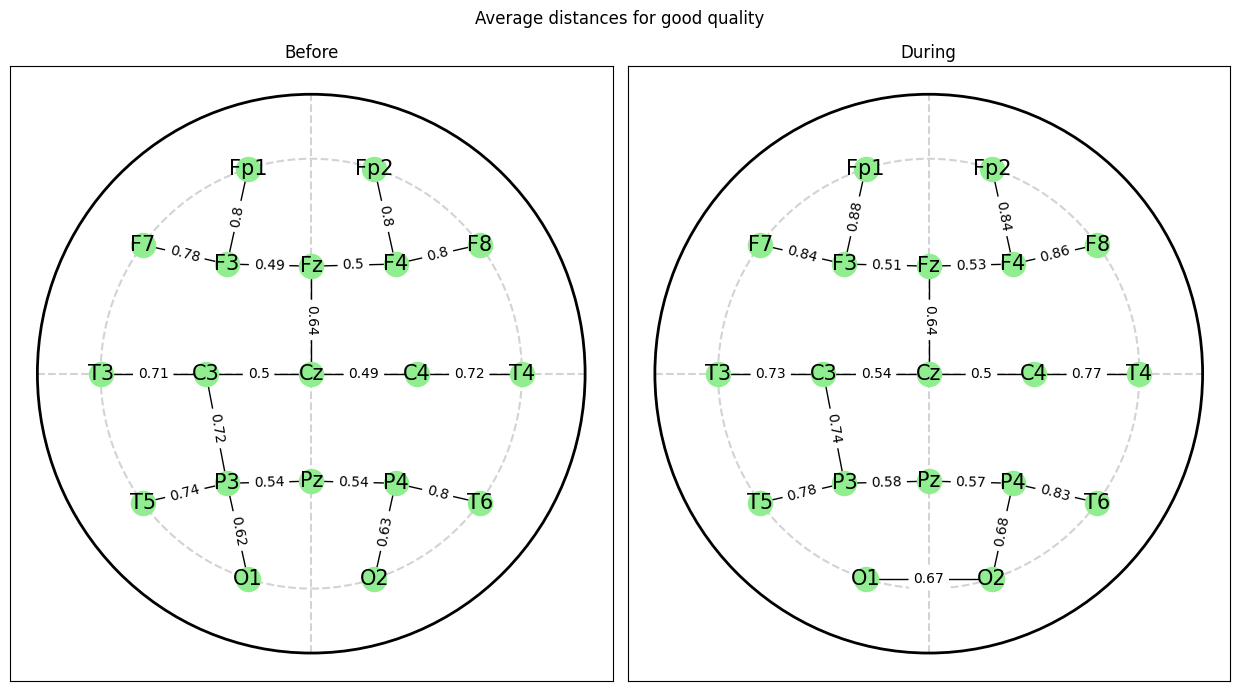

In [13]:
# MST promedio para todos los buenos antes y durante

plot_mst_distances(mst_ave_g_before, mst_ave_g_during, 'Average distances for good quality')

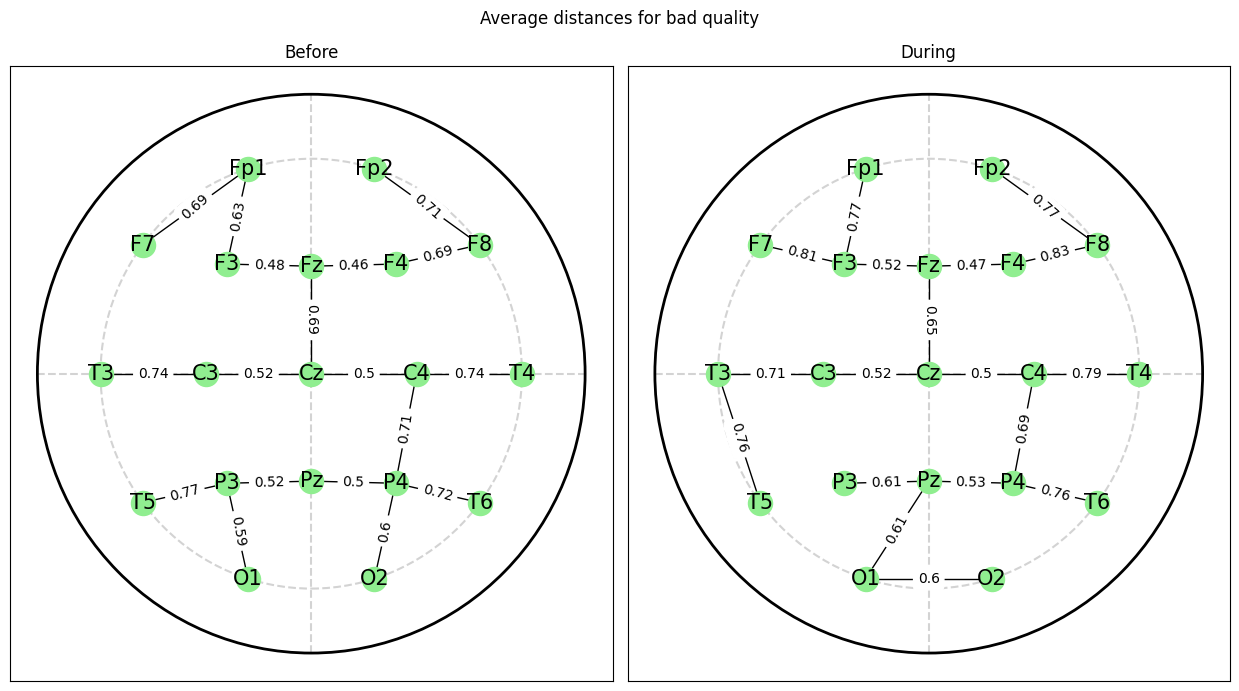

In [14]:
# MST para todos los buenos antes y durante
plot_mst_distances(mst_ave_b_before, mst_ave_b_during, 'Average distances for bad quality')

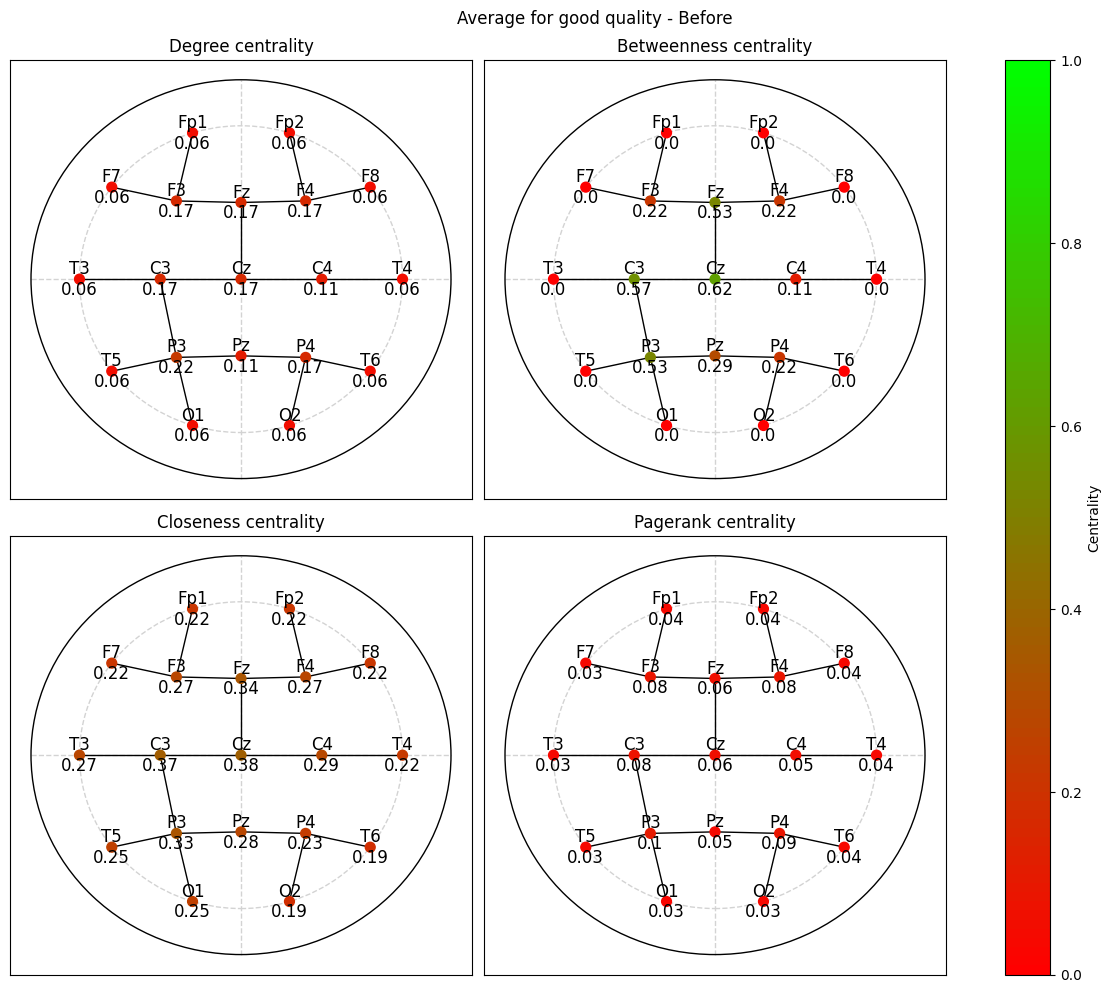

In [15]:
# Promedio de todos los buenos - antes

plot_all_measures(mst_ave_g_before, df_centrality_ave_g_before, 'Average for good quality - Before')

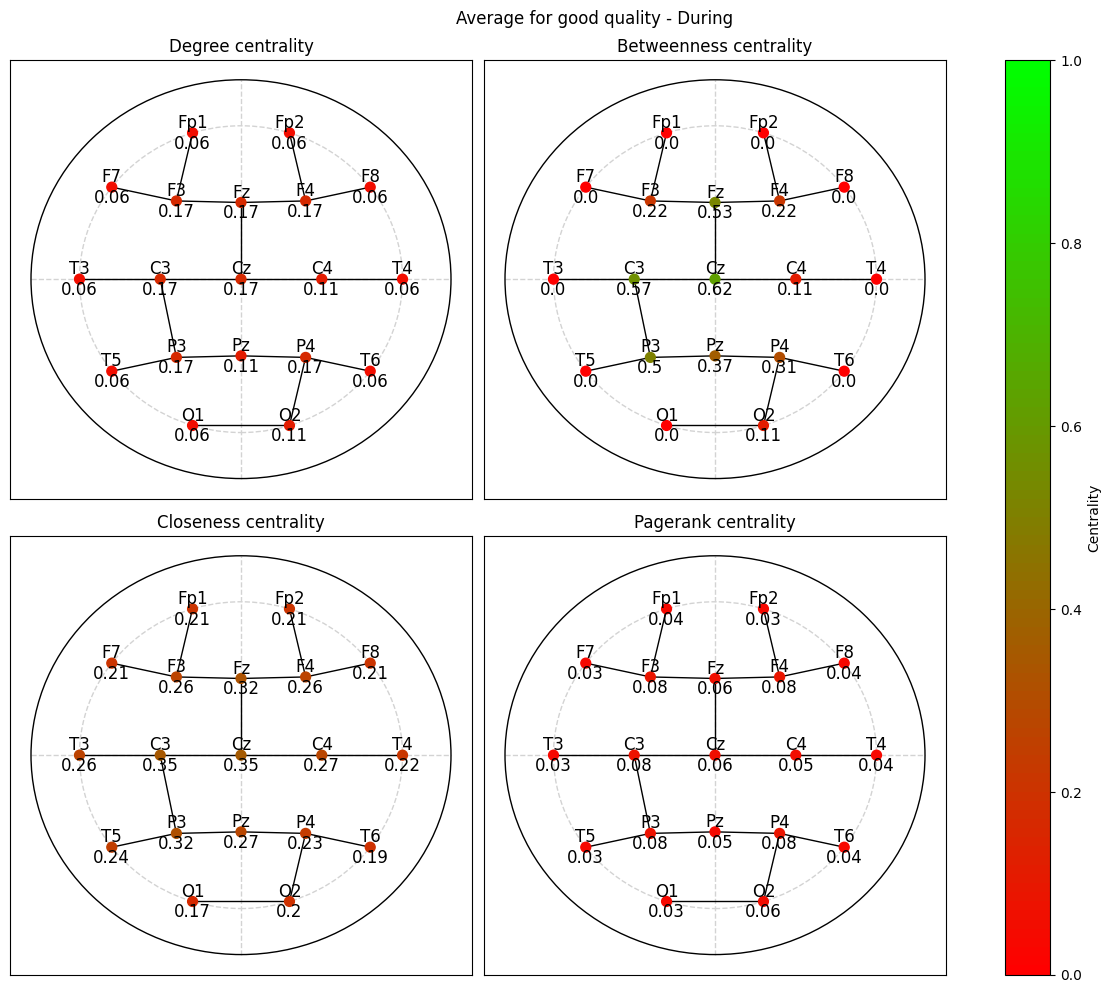

In [16]:
# Promedio de todos los buenos - durante

plot_all_measures(mst_ave_g_during, df_centrality_ave_g_during, 'Average for good quality - During')

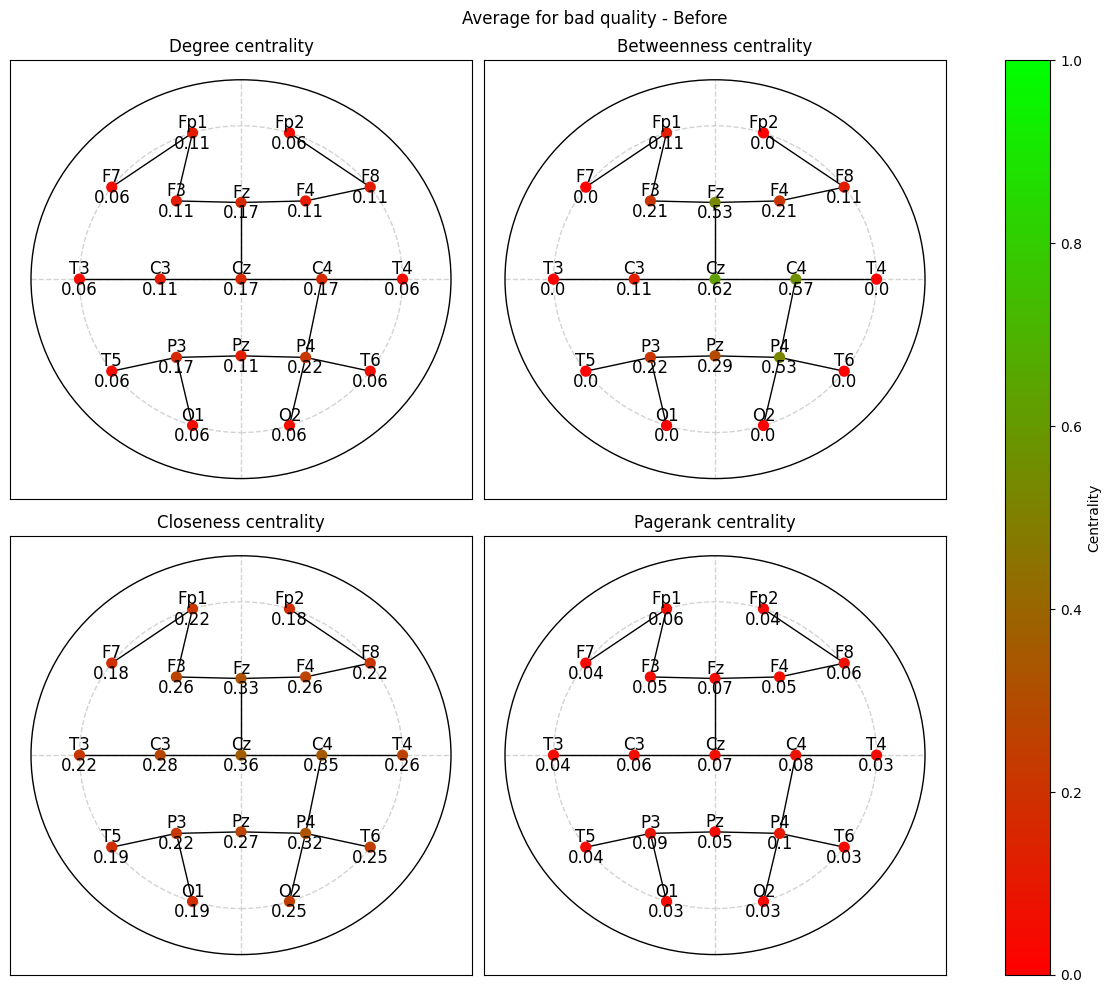

In [17]:
# Promedio de todos los malos - antes
plot_all_measures(mst_ave_b_before, df_centrality_ave_b_before, 'Average for bad quality - Before')

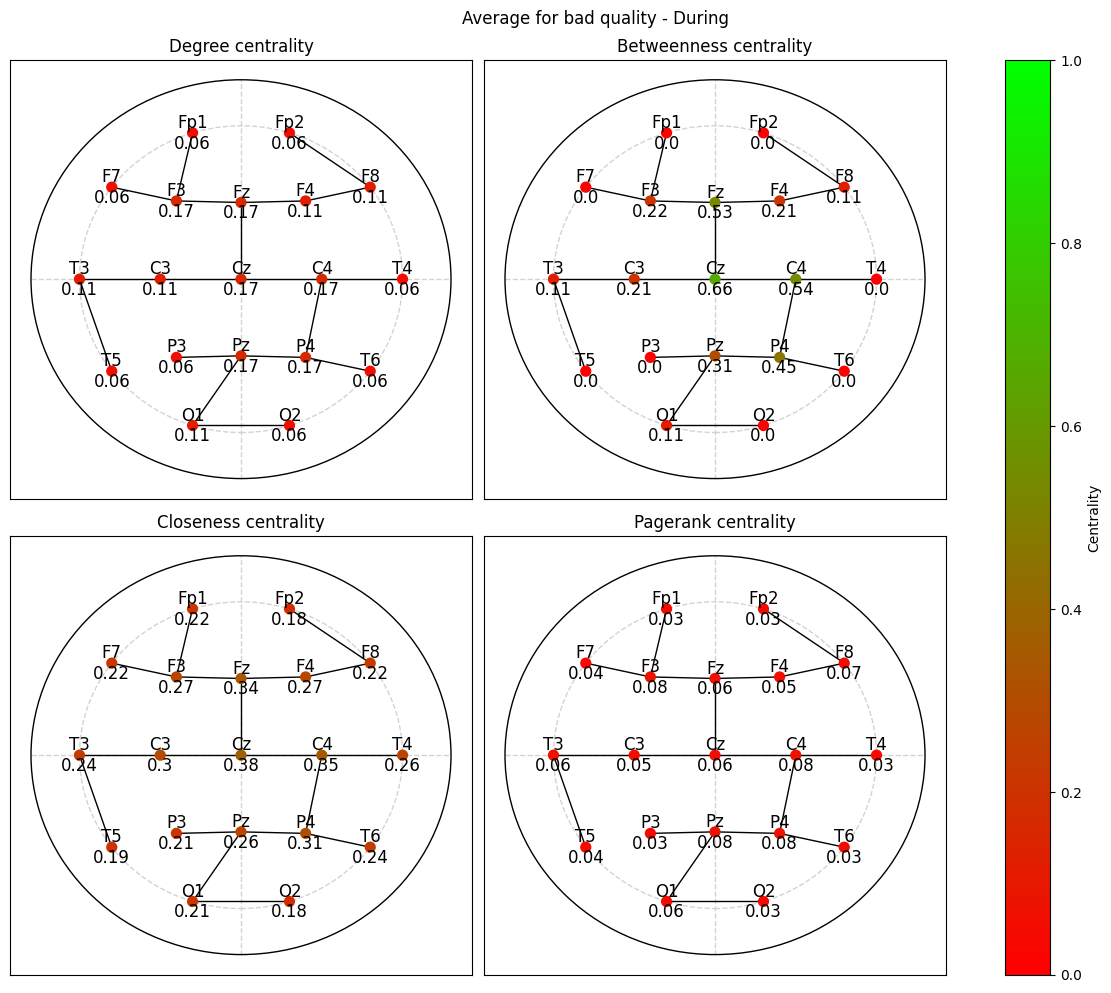

In [18]:
# Promedio de todos los malos - durante
plot_all_measures(mst_ave_b_during, df_centrality_ave_b_during, 'Average for bad quality - During')

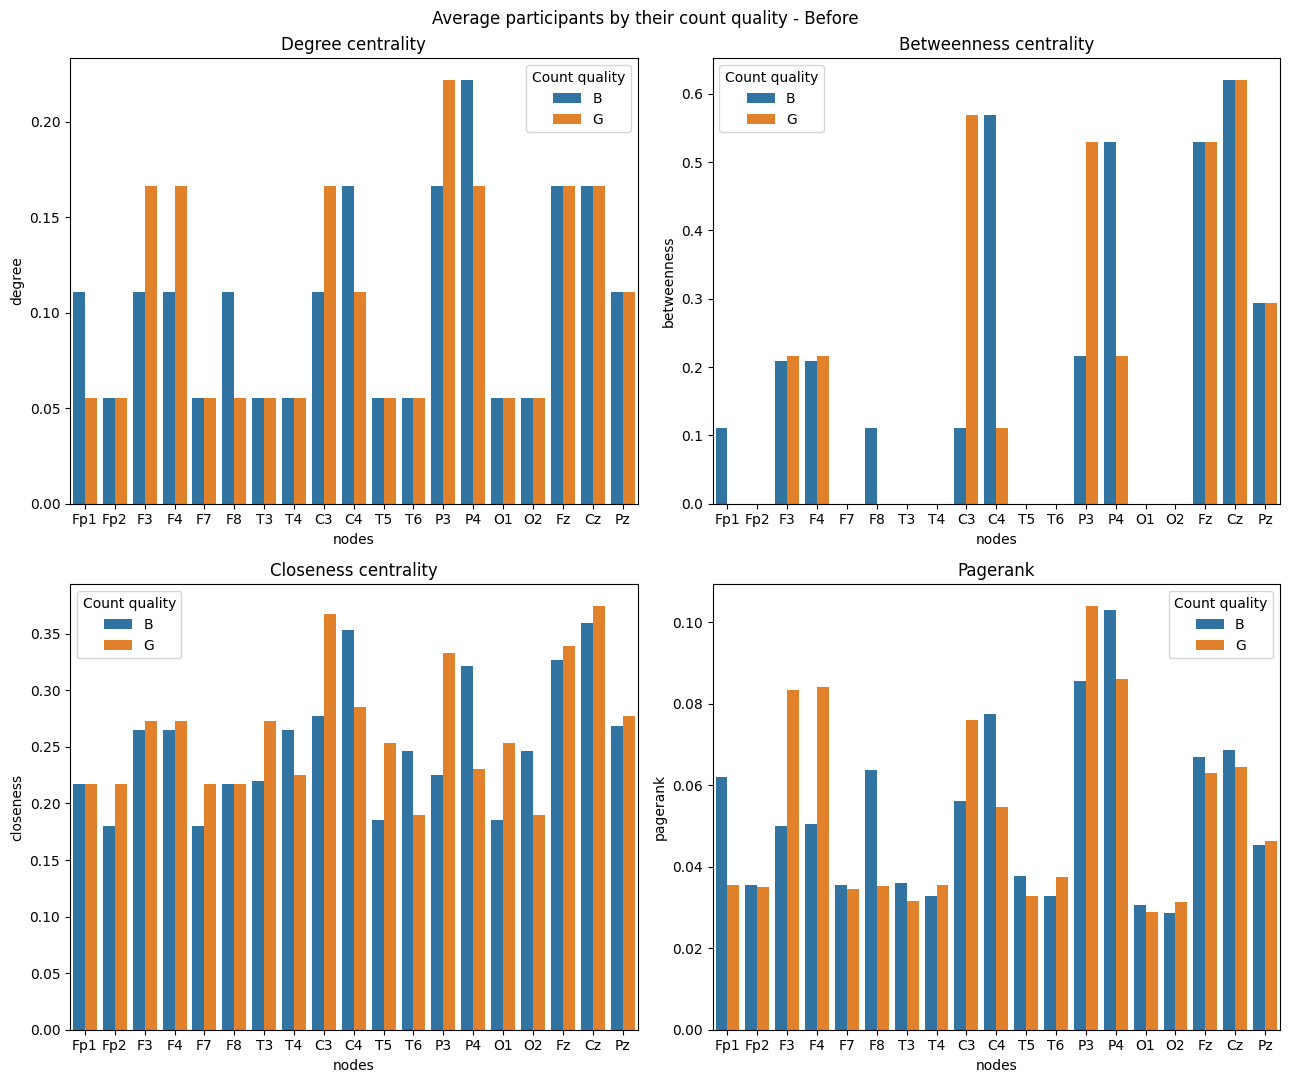

In [19]:
df_temp1 = df_centrality_ave_counts[df_centrality_ave_counts['status'] == 'before']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Average participants by their count quality - Before')

ax1.set_title('Degree centrality')
sns.barplot(
    df_temp1, x='nodes', y='degree', hue='Count quality', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(    
    df_temp1, x='nodes', y='betweenness', hue='Count quality', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_temp1, x='nodes', y='closeness', hue='Count quality', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_temp1, x='nodes', y='pagerank', hue='Count quality', ax=ax4
)

plt.tight_layout()

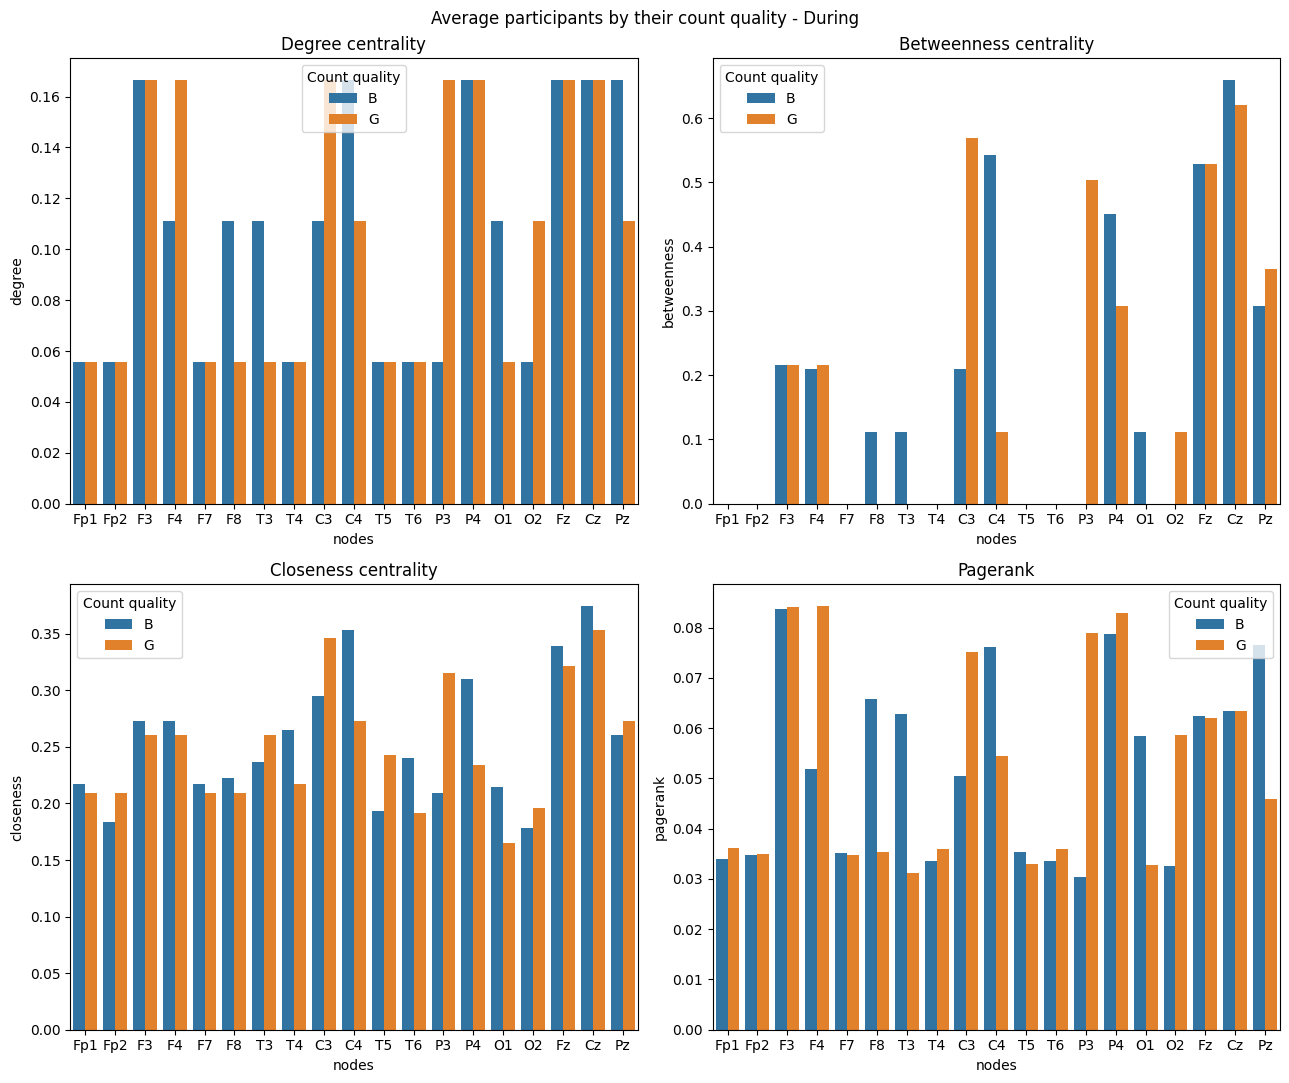

In [20]:
df_temp1 = df_centrality_ave_counts[df_centrality_ave_counts['status'] == 'during']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Average participants by their count quality - During')

ax1.set_title('Degree centrality')
sns.barplot(
    df_temp1, x='nodes', y='degree', hue='Count quality', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(
    df_temp1, x='nodes', y='betweenness', hue='Count quality', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_temp1, x='nodes', y='closeness', hue='Count quality', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_temp1, x='nodes', y='pagerank', hue='Count quality', ax=ax4
)

plt.tight_layout()

# Mapa topográfico

In [2]:
from ipywidgets import interact, FloatSlider
from IPython.display import display

In [92]:
N = 36

ave_signals = np.zeros((19, 122000), dtype=np.float32)
for i in range(N):
    if i in (4, 10, 31): continue # Descartar los casos con diferentes duraciones

    subject = f'Subject{i:02}'
    edf_path1 = f'Archivos\\{subject}\\edf\\{subject}_1.edf'
    edf_path2 = f'Archivos\\{subject}\\edf\\{subject}_2.edf'

    raw_before = mne.io.read_raw_edf(edf_path1)
    raw_during = mne.io.read_raw_edf(edf_path2)

    raw = mne.concatenate_raws([raw_before, raw_during])

    # Obtener los electrodos relevantes
    raw.drop_channels(['EEG A2-A1', 'ECG ECG'])
    raw.rename_channels(lambda eeg: eeg.replace('EEG ', ''))

    ave_signals += raw.get_data()

ave_signals /= N

Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject00\edf\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject00\edf\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject01\edf\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject01\edf\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject02\edf\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting

In [93]:
info = mne.create_info(CHANNELS, ch_types=['eeg']*19, sfreq=500)
info.set_montage("standard_1020")

raw = mne.io.RawArray(ave_signals, info)
evoked = mne.EvokedArray(raw.get_data(), info=raw.info)

display(info, evoked)

Creating RawArray with float64 data, n_channels=19, n_times=122000
    Range : 0 ... 121999 =      0.000 ...   243.998 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, F7, F8, T3, T4, C3, C4, T5, T6, P3, P4, O1, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

<Evoked | '' (average, N=1), 0 – 244 s, baseline off, 19 ch, ~17.7 MB>

In [94]:
def plot_topomap(time):
    evoked.plot_topomap(
        times=time, ch_type='eeg', show_names=True, size=5
    )

slider = FloatSlider(value=0, min=0, max=(len(raw.times)-1)*2e-3, step=2e-3, description="Seconds")
interact(plot_topomap, time=slider)
display(slider)

interactive(children=(FloatSlider(value=0.0, description='Seconds', max=243.99800000000002, step=0.002), Outpu…

FloatSlider(value=0.0, description='Seconds', max=243.99800000000002, step=0.002)

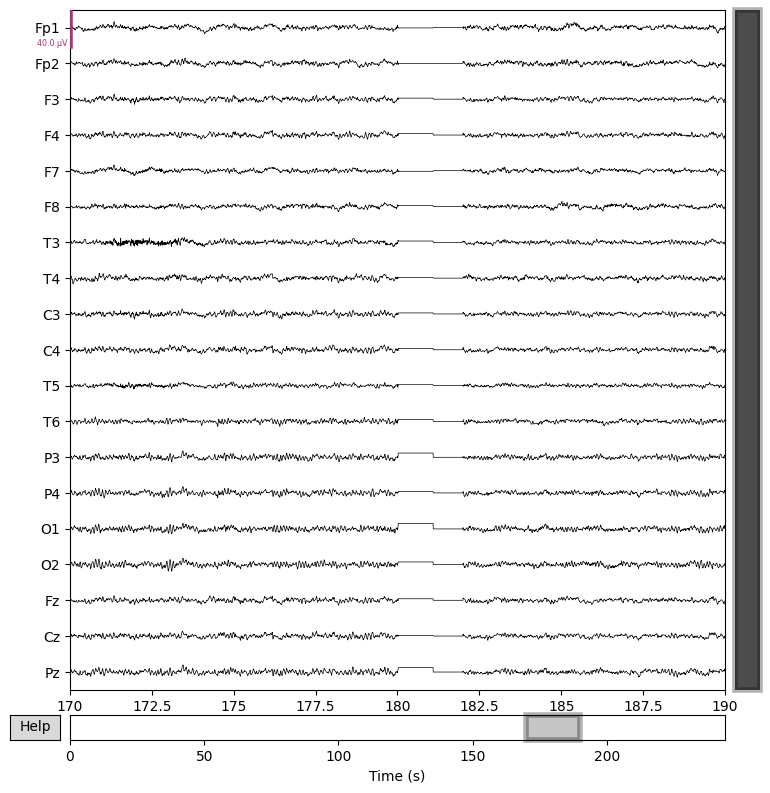

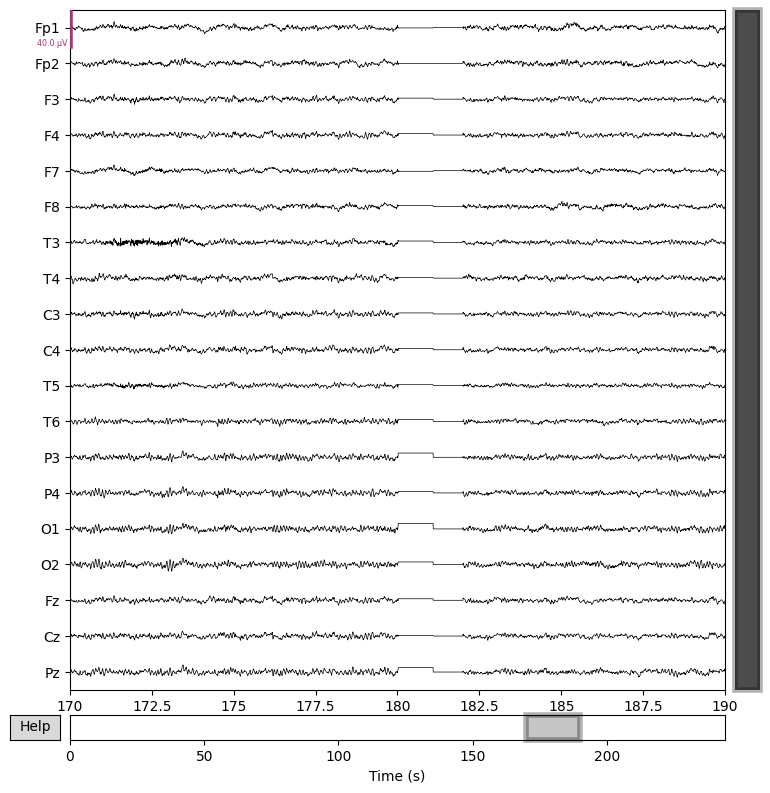

In [ ]:
raw.plot(start=170, duration=20)

Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject00\edf\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\JuanD\Documents\vscode\semillero\Archivos\Subject00\edf\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using matplotlib as 2D backend.


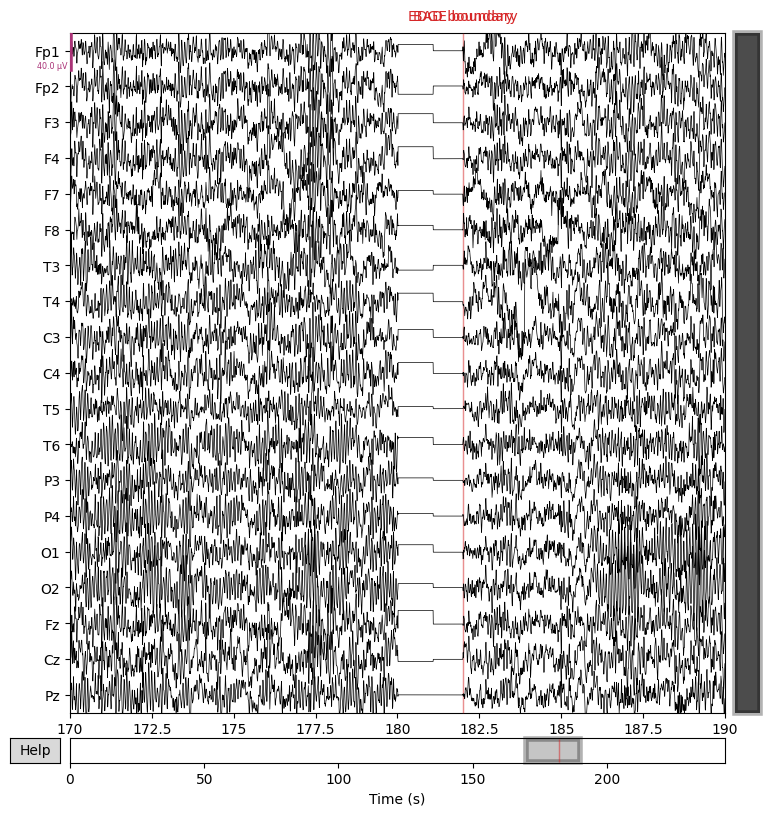

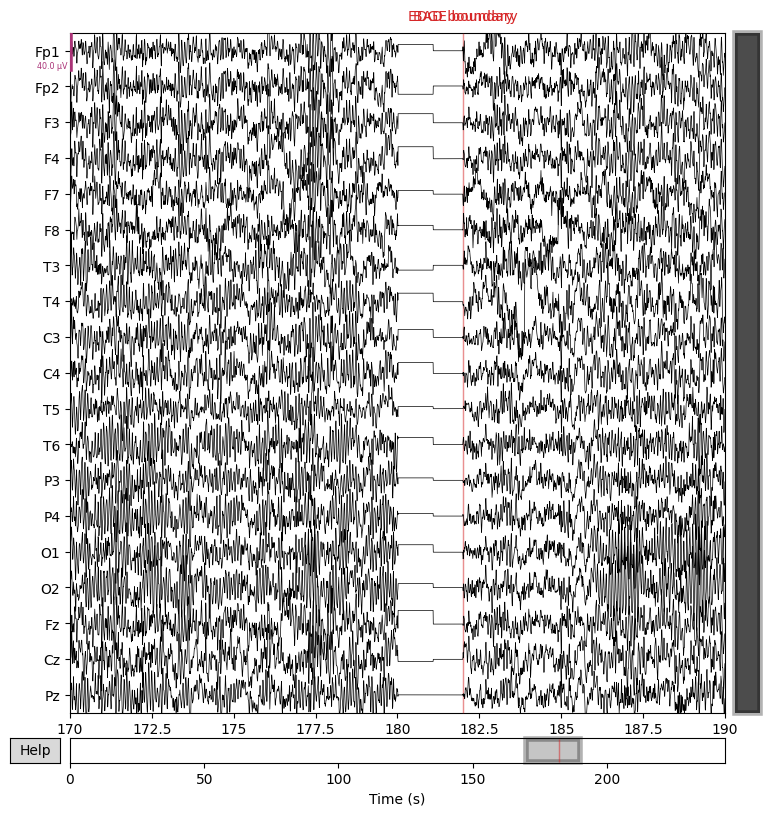

In [95]:
raw_0 = mne.io.read_raw_edf('Archivos\Subject00\edf\Subject00_1.edf')
raw_1 = mne.io.read_raw_edf('Archivos\Subject00\edf\Subject00_2.edf')

raw = mne.concatenate_raws([raw_0, raw_1], preload=True)

# Obtener los electrodos relevantes
raw.drop_channels(['EEG A2-A1', 'ECG ECG'])
raw.rename_channels(lambda eeg: eeg.replace('EEG ', ''))

evoked: mne.Evoked = mne.EvokedArray(raw.get_data(), info=raw.info)

montage = mne.channels.make_standard_montage("standard_1020")
evoked.info.set_montage(montage)

raw.plot(start=170, duration=20)

Extracting EDF parameters from c:\Users\perez\OneDrive\Documentos\vscode\semillero\Archivos\Subject00\edf\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


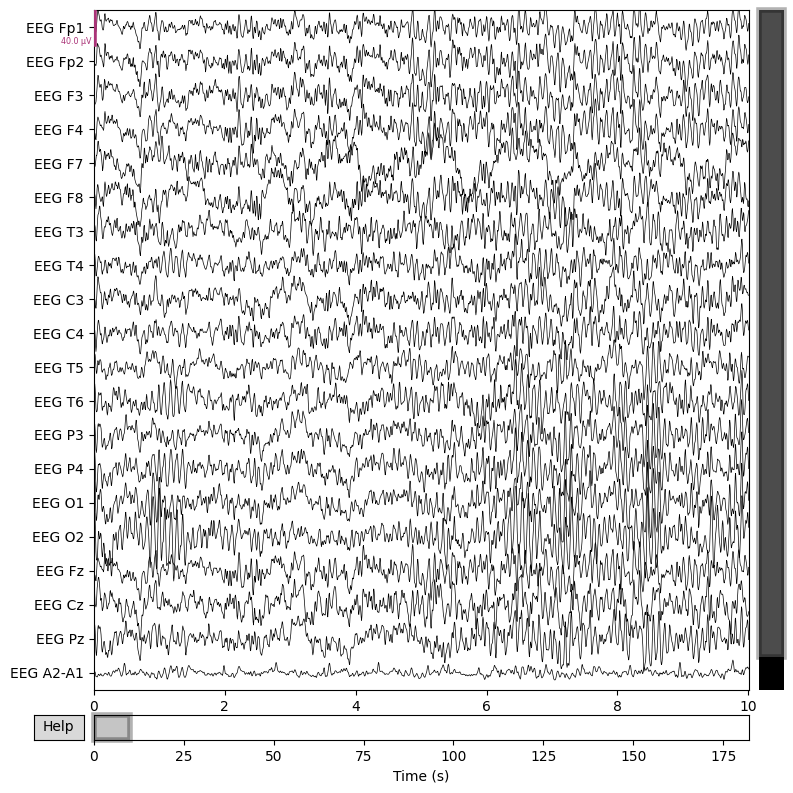

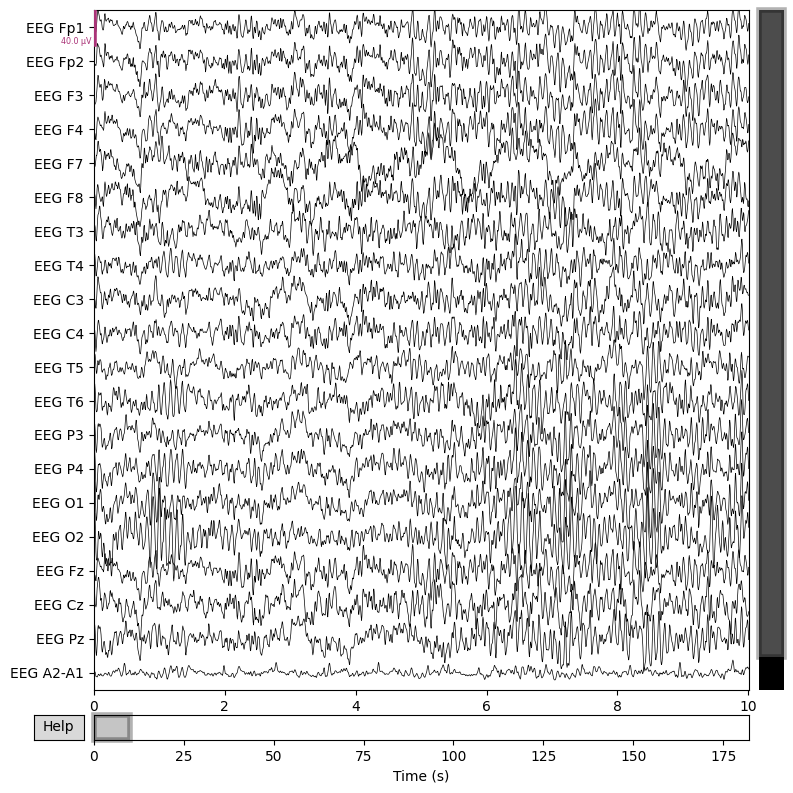

In [ ]:
mne.io.read_raw_edf('Archivos\Subject00\edf\Subject00_1.edf').plot()

In [8]:
# Crear el mismo resultado a partir de los csv's

df_1 = pd.read_csv('Archivos\Subject00\csv\Subject00_1.csv', sep=';')
df_2 = pd.read_csv('Archivos\Subject00\csv\Subject00_2.csv', sep=';')

info = mne.create_info(CHANNELS, ch_types=['eeg']*19, sfreq=500)
info.set_montage("standard_1020")

raw_0 = mne.io.RawArray(df_1, info)
raw_1 = mne.io.RawArray(df_2, info)

raw = mne.concatenate_raws([raw_0, raw_1], preload=True)

evoked = mne.EvokedArray(raw.get_data(), info=raw.info)

evoked

Creating RawArray with float64 data, n_channels=19, n_times=90000
    Range : 0 ... 89999 =      0.000 ...   179.998 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=30000
    Range : 0 ... 29999 =      0.000 ...    59.998 secs
Ready.


<Evoked | '' (average, N=1), 0 – 240 s, baseline off, 19 ch, ~17.4 MB>

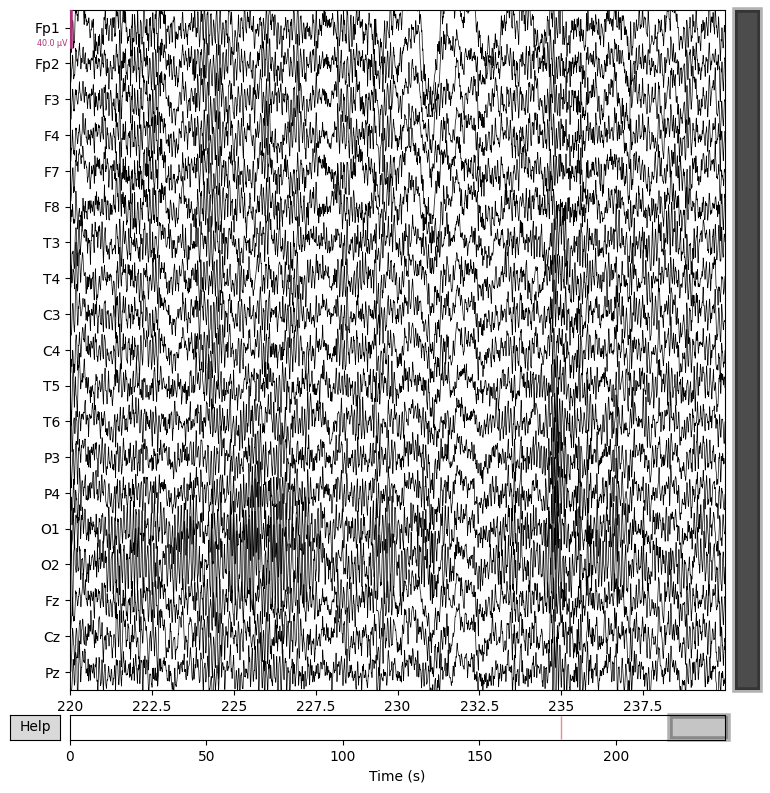

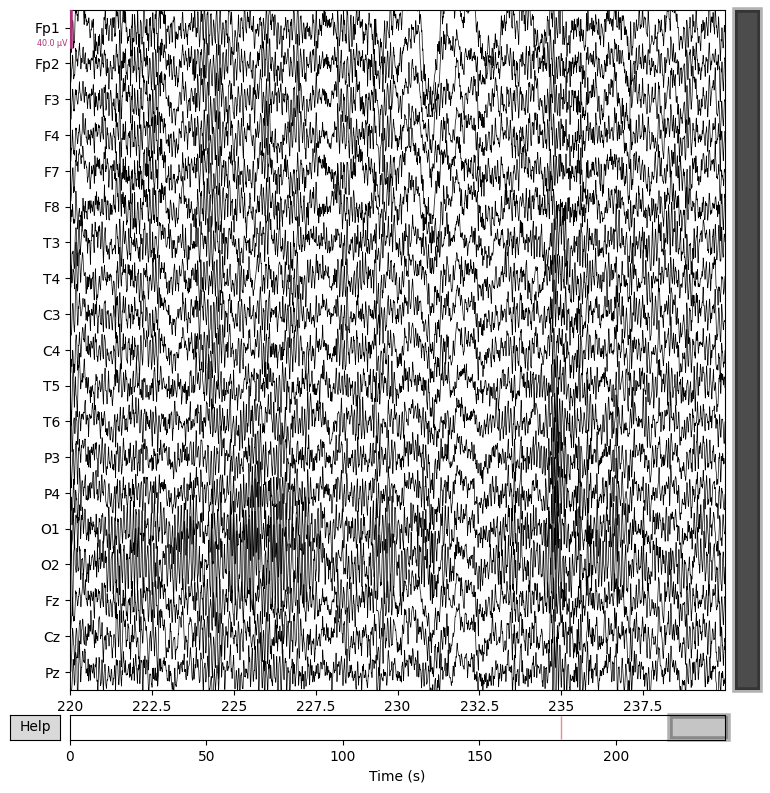

In [11]:
raw.plot(start=220, duration=21)